<a href="https://colab.research.google.com/github/JP27082003/DataScience/blob/main/Precos_barcos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Objetivo: Prever o preço dos barcos de acordo com as características
#Importar a base de dados
import pandas as pd

tabela = pd.read_csv("/content/drive/MyDrive/Python_Aula4/barcos_ref.csv")
display(tabela)


,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [19]:
#Tratar a base de dados
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


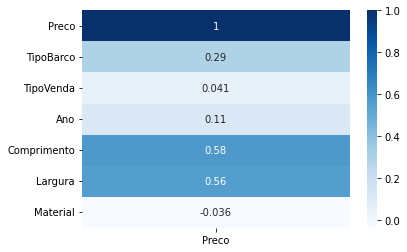

In [20]:
#Analisar os dados
display(tabela.corr()[["Preco"]])

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr()[["Preco"]], annot = True, cmap = "Blues")
plt.show()

In [21]:
#Criação da IA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

y = tabela["Preco"]
x = tabela.drop("Preco", axis = 1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 1)

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#Treinando as IAs
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [22]:
from sklearn.metrics import r2_score

#Criando as previsões
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

#Comparando os modelos
print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))


0.4490324760735812
0.8469384555235691


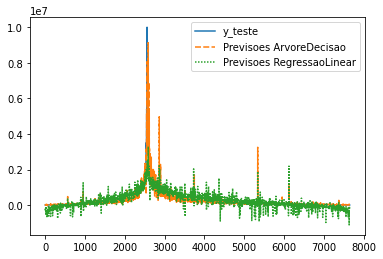

In [23]:
#Interpretação dos resultados
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes RegressaoLinear"] = previsao_regressaolinear

sns.lineplot(data = tabela_auxiliar)
plt.show()

In [24]:
tabela_nova = pd.read_csv("/content/drive/MyDrive/Python_Aula4/novos_barcos.csv")
display(tabela_nova)

previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)
#OBS: Os valores estão em euros

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 5949.24809524  9061.33666667 19870.5       ]


In [25]:
#Segundo as previsões, quanto maior o barco maior o preço